### Importing Libraries

In [1]:
#importing the dependencies

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset to a Pandas Dataframe
credit_card_data = pd.read_csv(r"C:\Users\james\OneDrive\Documents\OASIS INFOBYTE INTERNSHIP\PROJECT LIST DATA ANALYTICS\LEVEL 2\FRAUD DETECTION\DATASET\creditcard.csv")

### Display top 5 rows of the dataset

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Display last 5 rows of the dataset

In [5]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [6]:
credit_card_data.shape

(284807, 31)

In [7]:
print("Number of Rows",credit_card_data.shape[0])
print("Number of Columns",credit_card_data.shape[1])

Number of Rows 284807
Number of Columns 31


### Get Information About Our Dataset (Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement)

In [8]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#Check Null Values In The Dataset
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Feature Engineering

##### We will now select and transform relevant features to enhance fraud detection

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
credit_card_data['Amount']=sc.fit_transform(pd.DataFrame(credit_card_data['Amount']))

In [12]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [13]:
credit_card_data = credit_card_data.drop(['Time'],axis=1)

In [14]:
credit_card_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [15]:
credit_card_data.shape

(284807, 30)

In [16]:
#Checking the data for duplicated values
credit_card_data.duplicated().any()

True

In [17]:
#Removing Duplicated values
credit_card_data = credit_card_data.drop_duplicates()

In [18]:
credit_card_data.shape

(275663, 30)

In [19]:
284807-275663

9144

there is now a difference of 9144 after removing duplicate values

### Checking for Imbalanced Data

In [20]:
credit_card_data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

<AxesSubplot:ylabel='count'>

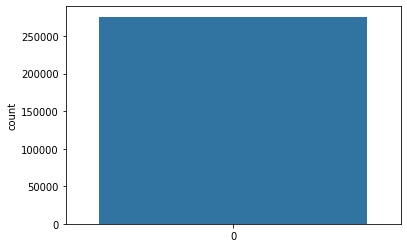

In [21]:
sns.countplot(credit_card_data['Class'])

In [22]:
#Store Feature Matrix In X And Response (Target) In Vector y

x = credit_card_data.drop('Class',axis=1)
y = credit_card_data['Class']

### Splitting The Dataset Into The Training Set And Test Set

In [23]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,
                                                 random_state=42)

### Handling Imbalanced Dataset

#### Under-Sampling

In [24]:
#separating the data for analysis
normal = credit_card_data[credit_card_data['Class']==0]
fraud = credit_card_data[credit_card_data['Class']==1]

In [25]:
normal.shape

(275190, 30)

In [26]:
fraud.shape

(473, 30)

In [27]:
normal_sample=normal.sample(n=473)

In [28]:
normal_sample.shape

(473, 30)

In [29]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [30]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [31]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.326326,-0.074748,1.723496,1.091868,-0.731032,1.193485,-0.017609,0.438574,0.170799,-0.183872,...,0.079371,0.297022,0.384312,-0.269238,-1.100298,0.501900,0.195889,0.199147,0.183554,0
1,-1.720427,-0.552104,0.851425,1.629354,-0.694075,0.693939,1.639966,-0.034820,-0.501043,-0.032307,...,0.033857,0.366835,0.262243,0.252204,-0.061722,-0.254815,0.435418,0.229298,1.405529,0
2,-0.359913,1.104947,1.420393,0.143011,-0.183814,-1.184368,0.677341,-0.060511,-0.327629,-0.493892,...,-0.250172,-0.677302,0.028917,0.644342,-0.224850,0.053682,0.242774,0.100161,-0.345313,0
3,1.703578,-0.481657,-1.968830,0.468188,0.197102,-0.675757,0.282543,-0.209036,0.989606,-0.932650,...,-0.151003,-0.580993,0.062763,0.497142,-0.102918,-0.130135,-0.040133,0.013697,0.364347,0
4,0.301585,0.561754,0.754687,0.839509,-0.024987,1.032879,-0.212128,0.212671,0.194073,0.220737,...,0.385560,1.381401,-0.056997,0.262695,-1.223114,0.034129,0.231323,0.261094,-0.279665,0


In [32]:
x = new_data.drop('Class',axis=1)
y = new_data['Class']

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,
                                                 random_state=42)

### Logistic Regression

In [34]:
#training the logistic Regression model with Training Data
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred1 = log.predict(x_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))
accuracy_score(y_test,y_pred1)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        88
           1       0.96      0.91      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



0.9315789473684211

The Logostic Regression Model gives 93% accuracy.

### Decision Tree Classifier

In [37]:
#training the Decision Tree Classifier model with Training Data
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred2 = dt.predict(x_test)

In [39]:
print(classification_report(y_test, y_pred2))
accuracy_score(y_test,y_pred2)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        88
           1       0.90      0.89      0.90       102

    accuracy                           0.89       190
   macro avg       0.89      0.89      0.89       190
weighted avg       0.89      0.89      0.89       190



0.8894736842105263

The Decision Tree Classifier Model gives 89% accuracy.

### Random Forest Classifier

In [40]:
#training the Random Forest Classifier model with Training Data
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
y_pred3 = rf.predict(x_test)

In [42]:
print(classification_report(y_test, y_pred3))
accuracy_score(y_test,y_pred3)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        88
           1       0.96      0.90      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



0.9263157894736842

The Random Forest Classifier Model gives 93% accuracy.

In [43]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [44]:
final_data

,Models,ACC
0,LR,93.157895
1,DT,88.947368
2,RF,92.631579


<AxesSubplot:xlabel='Models', ylabel='ACC'>

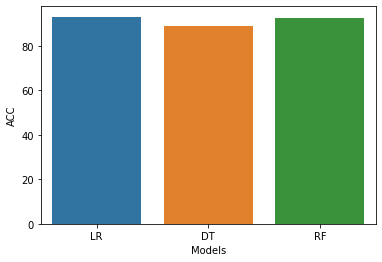

In [45]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])


### Oversampling


In [46]:
x = credit_card_data.drop('Class',axis=1)
y = credit_card_data['Class']

In [47]:
x.shape

(275663, 29)

In [48]:
y.shape

(275663,)

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [52]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.20,
                                                 random_state=42)

### Logistic Regression

In [55]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred1 = log.predict(x_test)

In [57]:
print(classification_report(y_test, y_pred1))
accuracy_score(y_test,y_pred1)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     55073
           1       0.97      0.92      0.94     55003

    accuracy                           0.94    110076
   macro avg       0.95      0.94      0.94    110076
weighted avg       0.95      0.94      0.94    110076



0.9449562120716596

The Logistic Regression Model gives 95% accuracy.

### Decision Tree Classifier

In [58]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pred2 = dt.predict(x_test)

In [60]:
print(classification_report(y_test, y_pred2))
accuracy_score(y_test,y_pred2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



0.9979922962316945

The Decision Tree Classifier model gives 100% accuracy.

### Random Forest Classifier

In [62]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
y_pred3 = rf.predict(x_test)

In [64]:
print(classification_report(y_test, y_pred3))
accuracy_score(y_test,y_pred3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



0.9999364075729495

The Random Forest Classifier gives 100% accuracy

In [65]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [66]:
final_data

,Models,ACC
0,LR,94.495621
1,DT,99.799230
2,RF,99.993641


<AxesSubplot:xlabel='Models', ylabel='ACC'>

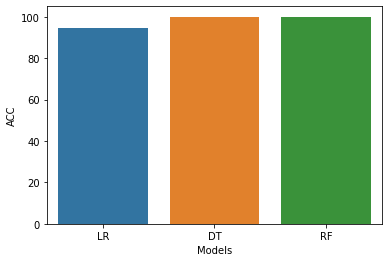

In [67]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])


### Real-Time Monitoring

#### Now, we can save the model and execute real time monitoring.

In [68]:
rf1 = RandomForestClassifier()
rf1.fit(x_res,y_res)

RandomForestClassifier()

In [69]:
import joblib

In [70]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [71]:
model = joblib.load("credit_card_model")

In [72]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [73]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation
